In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
year_re = re.compile(r'\b\d{4}\b')
df = pd.read_json('kamerstukken_tot_1995.json')
year = df.document.apply(lambda x: year_re.search(x)[0])
df['year'] = year
df['extract'] = df['extract'].apply(lambda x: x.lower())
df['year'] = df.year.astype('int')

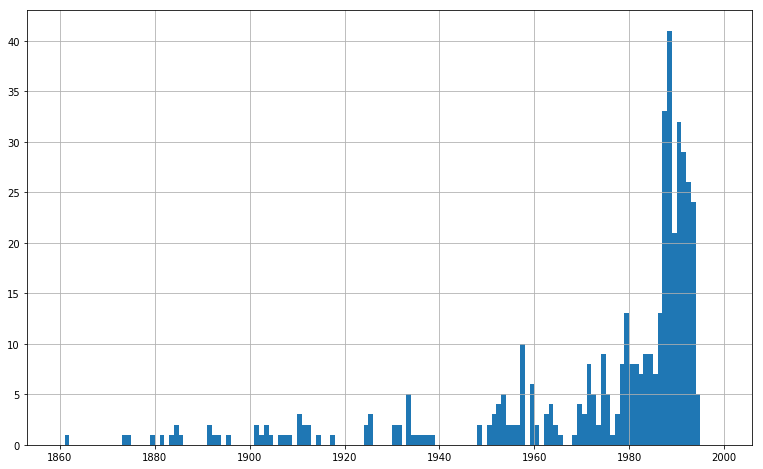

In [4]:
fig, ax = plt.subplots(figsize=(13, 8))
df.year.hist(bins=np.arange(1860, 2000, 1), ax=ax)

In [38]:
df['stijging_term'] = df['extract'].apply(lambda x:'stijging' in x or 'rijzing' in x)
df['daling_term'] = df['extract'].apply(lambda x:'daling' in x)
df['co2_term'] = df['extract'].apply(lambda x:'dioxide' in x or 'co2' in x)
df['klimaat_term'] = df['extract'].apply(lambda x:'klimaat' in x)
df['ijs_term'] = df['extract'].apply(lambda x:'ijs' in x or 'pool' in x or 'smelt' in x or 'groenland' in x or 'polen' in x or 'antarctica' in x)
df['gas_term'] = df['extract'].apply(lambda x:'gas' in x or 'boring' in x)
df['zee_term'] = df['extract'].apply(lambda x: 'zee' in x)
df['bodem_term'] = df['extract'].apply(lambda x: 'bodem' in x)
df['meter_term'] = df['extract'].apply(lambda x: 'meter' in x)

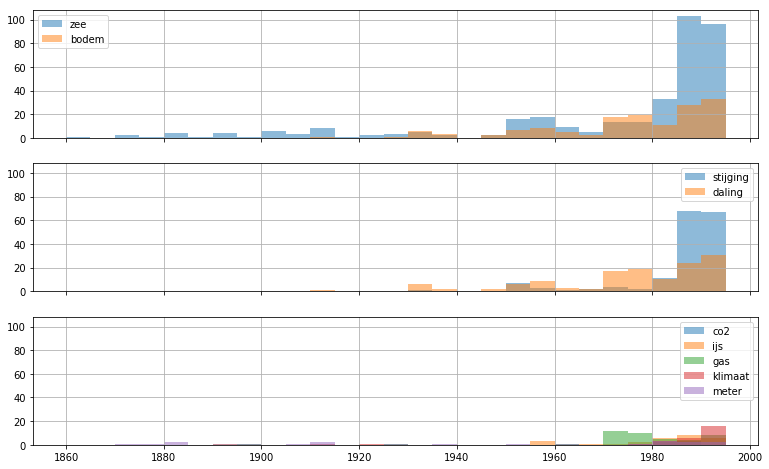

In [37]:
bins = np.arange(1860, 2000, 5)

fig, axes = plt.subplots(3, 1, figsize=(13, 8), sharex=True, sharey=True)
df[df['zee_term']].year.hist(bins=bins, ax=axes[0], alpha=0.5, label='zee')
df[df['bodem_term']].year.hist(bins=bins, ax=axes[0], alpha=0.5, label='bodem')
df[df['stijging_term']].year.hist(bins=bins, ax=axes[1], alpha=0.5, label='stijging')
df[df['daling_term']].year.hist(bins=bins, ax=axes[1], alpha=0.5, label='daling')
df[df['co2_term']].year.hist(bins=bins, ax=axes[2], alpha=0.5, label='co2')
df[df['ijs_term']].year.hist(bins=bins, ax=axes[2], alpha=0.5, label='ijs')
df[df['gas_term']].year.hist(bins=bins, ax=axes[2], alpha=0.5, label='gas')
df[df['klimaat_term']].year.hist(bins=bins, ax=axes[2], alpha=0.5, label='klimaat')
df[df['meter_term']].year.hist(bins=bins, ax=axes[2], alpha=0.5, label='meter')

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

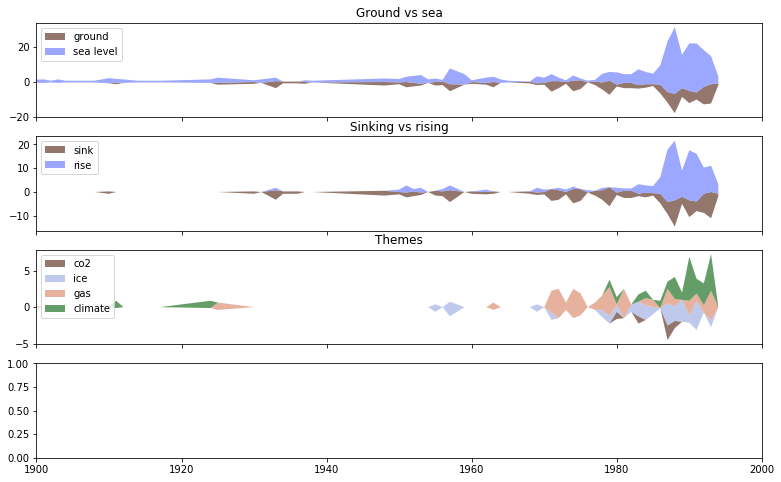

In [55]:
summed = df.groupby('year').agg('sum')

stacks = [
    {
        "title": "Ground vs sea",
        "labels": ["ground", "sea level"],
        "columns": ["bodem_term", "zee_term"],
        "colors": ['#785547', '#8491FF']
    },
    {
        "title": "Sinking vs rising",
        "labels": ["sink", "rise"],
        "columns": ["daling_term", "stijging_term"],
        "colors": ['#785547', '#8491FF']
    },
    {
        "title": "Themes",
        "labels": ["co2", "ice", "gas", "climate"],
        "columns": ['co2_term', "ijs_term", "gas_term", "klimaat_term"],
        "colors": ['#785547', '#AFBCE8', '#E09F85', '#3F8543']
    }
]




# columns = ['daling', 'stijging']
fig, axes = plt.subplots(len(stacks) + 1, 1, figsize=(13, 8), sharex=True)
for stack, ax in zip(stacks, axes):
    ax.set_title(stack['title'])
    ax.stackplot(
        summed.index, 
        summed[stack['columns']].values.T, 
        baseline='wiggle', 
        labels=stack['labels'],
        colors=stack['colors'],
        alpha=0.8
    )
    ax.legend(loc='upper left')
    ax.set_xlim(1900, 2000)

annotations = [
    {
        "year": 1956,
        "annotation": "storm surge"
    },
    {
        "year": 1916,
        "annotation": "storm surge"
    },
    {
        "years": [1940, 1945],
        "annotation": "world war 2"
    },
    {
        "years": [1914, 1918],
        "annotation": "world war 1"
    }
]

for annotation in 
axes[1]
